In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(([], []), ([], []))

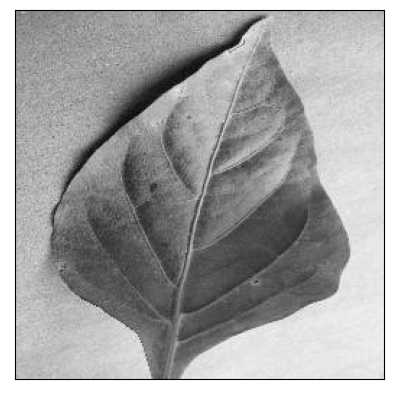

In [3]:
img = cv2.imread(r"C:\Users\DELL\Desktop\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___healthy\ba527e73-8be2-4c53-9e5b-cafeab987bba___JR_HL 8037.JPG",0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

Text(0, 0.5, 'Frequency')

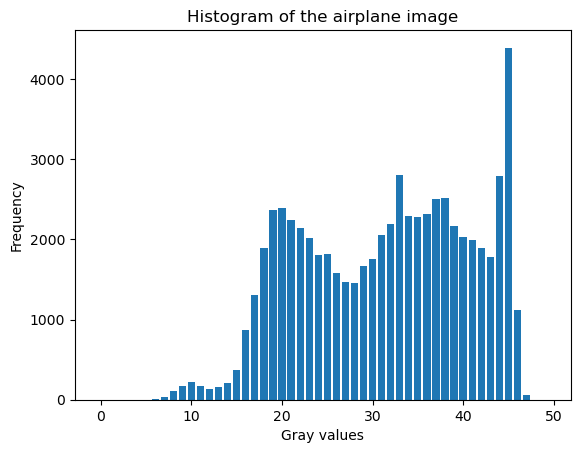

In [4]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

# different methods for displaying a histogram
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the airplane image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

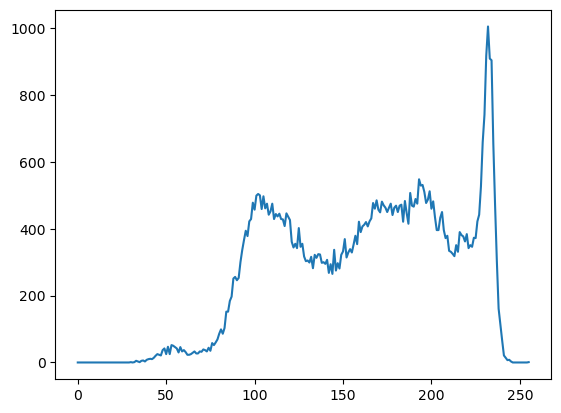

In [5]:
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

In [6]:
high = cv2.imread(r"C:\Users\DELL\Desktop\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___healthy\c6111f5b-213f-4a67-bdda-7bb5af53c637___JR_HL 7637.JPG")
low = cv2.imread(r"C:\Users\DELL\Desktop\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___healthy\d85bb844-caf7-4858-93e8-74becbd7dbd8___JR_HL 5926.JPG")

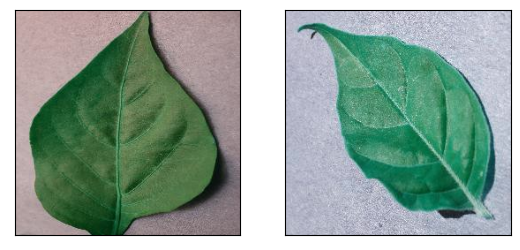

In [7]:
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

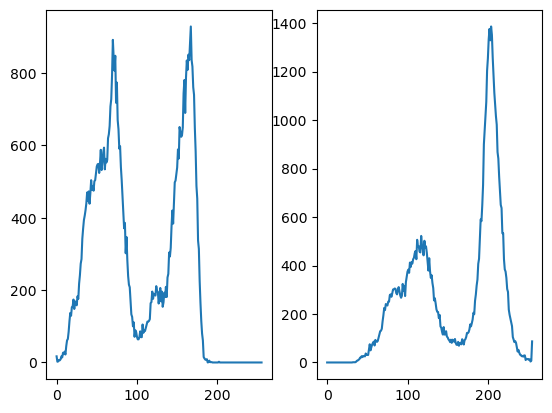

In [8]:
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

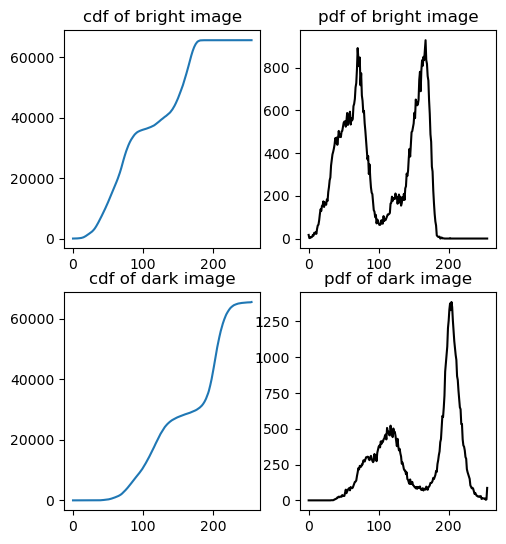

In [9]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

plt.subplot(221), plt.plot(cdf_high), plt. title('cdf of bright image')
plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('pdf of bright image')

plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of dark image')
plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('pdf of dark image')

plt.subplots_adjust(bottom=2, right=0.8, top=3)

plt.show()

In [10]:
low_gray = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)

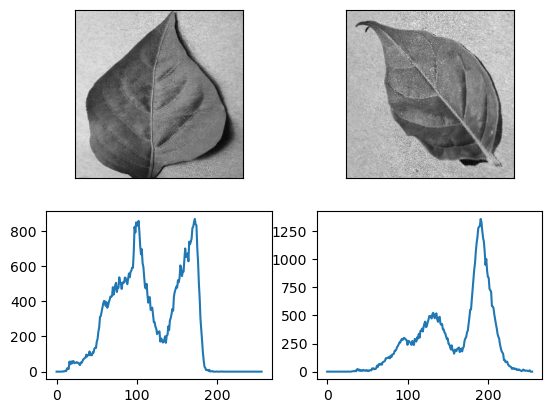

In [11]:
plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()

In [12]:
def manip_image(image, alpha, beta):
  
  new_image = np.zeros(image.shape, image.dtype)
  
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
  
  return new_image

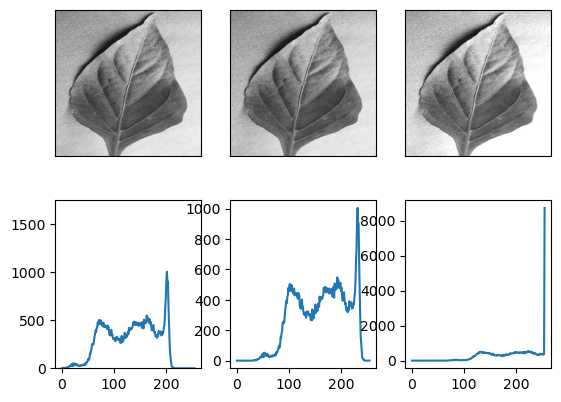

In [13]:
bright = manip_image(img, 1, 30)
dark = manip_image(img, 1, -30)

plt.figure()
plt.subplot(231), plt.imshow(dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256])), plt.ylim((0, 1750))

plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))

plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))

([<matplotlib.lines.Line2D at 0x1689d79c1c0>], (0.0, 1100.0))

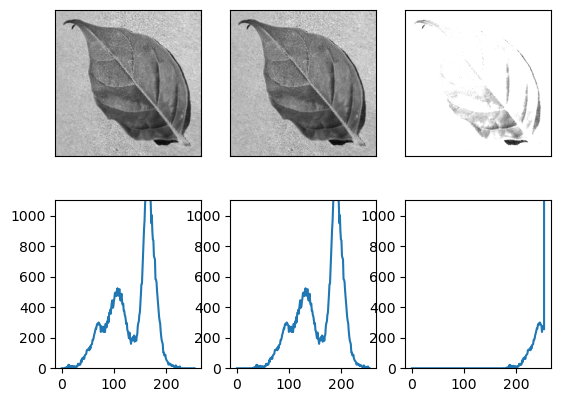

In [15]:
l_bright = manip_image(low_gray, 1, 150)
l_dark = manip_image(low_gray, 1, -25)

plt.figure()
plt.subplot(231), plt.imshow(l_dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(l_bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234)
plt.plot(cv2.calcHist([l_dark],[0],None,[256],[0,256])), plt.ylim((0, 1100))

plt.subplot(235)
plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256])), plt.ylim((0, 1100))

plt.subplot(236)
plt.plot(cv2.calcHist([l_bright],[0],None,[256],[0,256])), plt.ylim((0, 1100))

(0.0, 1750.0)

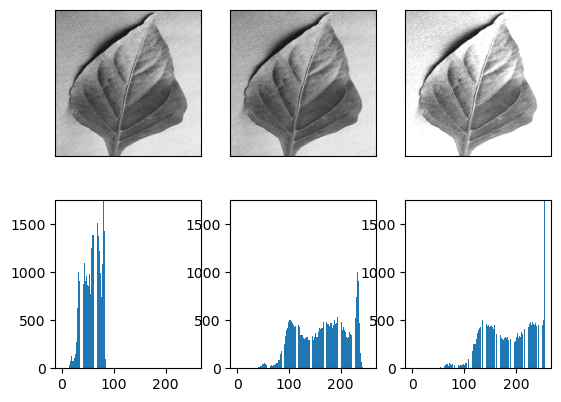

In [16]:
increase_contrast = manip_image(img, 1.35, 0)
decrease_contrast = manip_image(img, 0.35, 0)

plt.figure()
plt.subplot(231), plt.imshow(decrease_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(increase_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(234)
plt.bar(range(256), 
        cv2.calcHist([decrease_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

<BarContainer object of 256 artists>

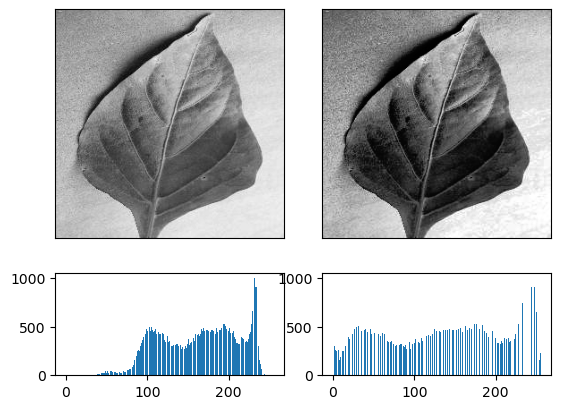

In [17]:
img_eq = cv2.equalizeHist(img)

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_eq, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_eq],[0],None,[256],[0,256]).ravel())

<BarContainer object of 256 artists>

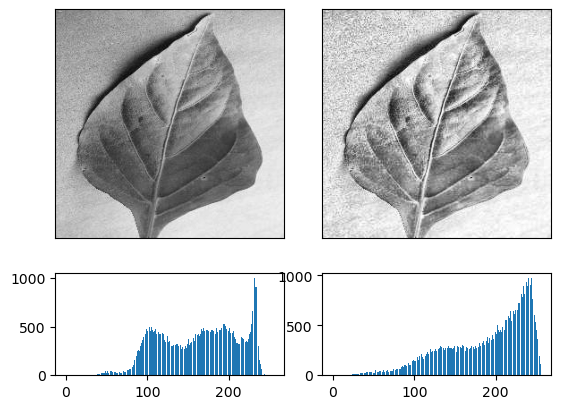

In [18]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
img_cl = clahe.apply(img)

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_cl, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_cl],[0],None,[256],[0,256]).ravel())